In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly
plotly.offline.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('state2.csv', delimiter=',')
df.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,26150,46,5,1,0,0,1,0,0,0,0
1,6605,71,1,0,0,0,1,0,0,0,0
2,18548,38,8,0,1,1,0,0,0,0,0
3,47668,54,3,0,1,1,0,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,0


In [12]:
print(df.columns)

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender_F ',
       'marital_status_1', 'marital_status_2', 'marital_status_3',
       'state_code_Midwest', 'state_code_Northeast', 'state_code_South'],
      dtype='object')


In [13]:
df.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,26150,46,5,1,0,0,1,0,0,0,0
1,6605,71,1,0,0,0,1,0,0,0,0
2,18548,38,8,0,1,1,0,0,0,0,0
3,47668,54,3,0,1,1,0,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,0


In [16]:

from sklearn.preprocessing import StandardScaler
# create a new DataFrame with only the columns to standardize
subset = df[['income', 'age','years_with_bank','nbr_children']]

# instantiate StandardScaler object
scaler = StandardScaler()

# fit scaler to data
scaler.fit(subset)


# transform data
subset_transformed = scaler.transform(subset)

# transform data and overwrite original columns
df[['income', 'age','years_with_bank','nbr_children']] = scaler.transform(subset)

df['gender_F ']=0.5* df['gender_F ']
df['marital_status_1']= 0.5* df['marital_status_1']
df['marital_status_2']= 0.5* df['marital_status_2']
df['marital_status_3']= 0.5* df['marital_status_3']
df['state_code_Midwest']= 0.5* df['state_code_Midwest']
df['state_code_Northeast']= 0.5* df['state_code_Northeast']
df['state_code_South']= 0.5* df['state_code_South']
df_scaled=df

In [17]:
# import Kmeans from sklearn
from sklearn.cluster import KMeans


inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)

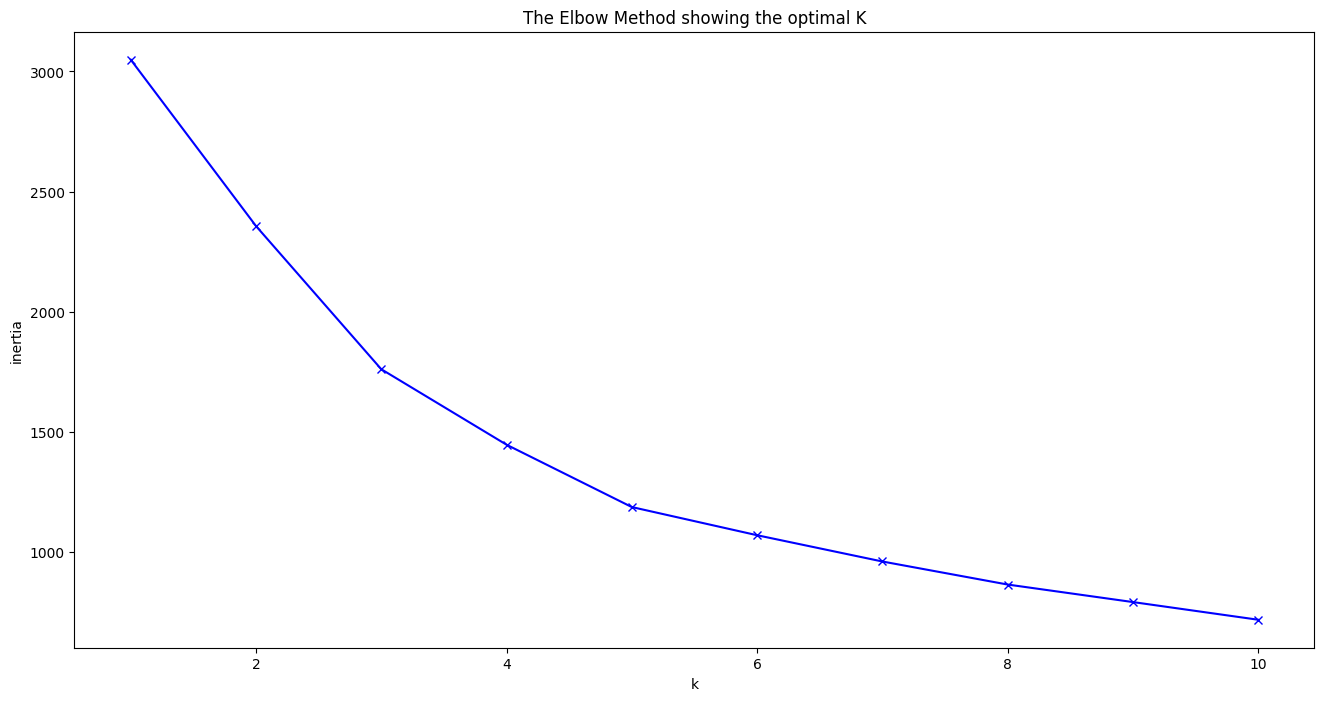

In [18]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))

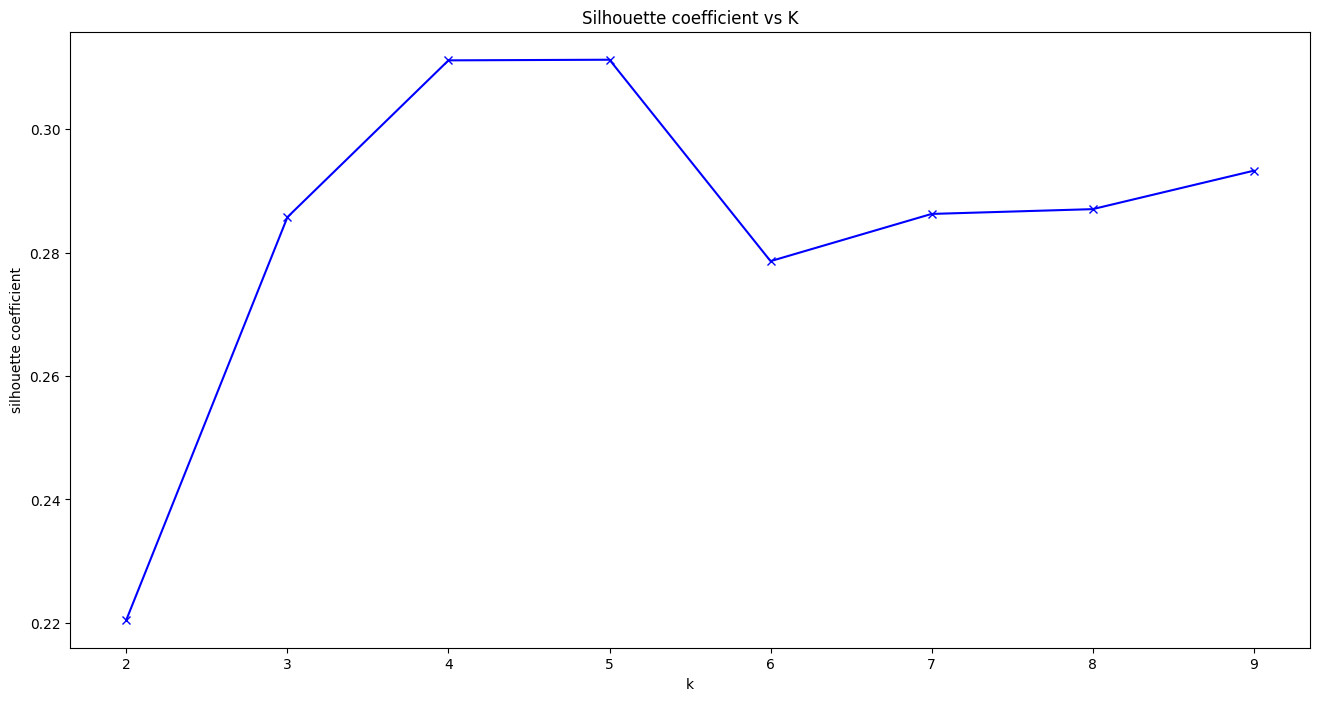

In [20]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [21]:
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(df_scaled)

In [22]:
y_km

array([2, 0, 2, 0, 2, 1, 3, 2, 1, 2, 2, 3, 0, 3, 1, 3, 0, 3, 2, 3, 0, 0,
       4, 2, 1, 0, 3, 3, 2, 0, 0, 4, 1, 2, 0, 1, 3, 0, 2, 3, 3, 1, 0, 1,
       0, 0, 0, 3, 1, 4, 3, 3, 4, 2, 2, 0, 0, 2, 4, 3, 1, 3, 3, 0, 4, 3,
       2, 1, 3, 3, 0, 1, 2, 0, 2, 2, 3, 0, 3, 3, 4, 2, 0, 3, 2, 1, 0, 0,
       0, 2, 1, 3, 3, 0, 3, 0, 3, 0, 0, 1, 2, 2, 1, 0, 1, 0, 4, 2, 4, 2,
       3, 2, 2, 0, 1, 1, 1, 0, 4, 1, 4, 1, 2, 1, 3, 2, 3, 0, 1, 3, 2, 0,
       3, 0, 2, 3, 2, 1, 3, 0, 4, 4, 1, 3, 2, 3, 2, 2, 0, 1, 3, 0, 0, 4,
       0, 2, 3, 2, 1, 2, 2, 4, 3, 1, 1, 1, 0, 3, 0, 2, 0, 2, 2, 0, 0, 3,
       2, 4, 2, 0, 3, 3, 2, 3, 4, 0, 0, 1, 2, 1, 0, 1, 3, 3, 1, 3, 3, 3,
       1, 1, 2, 2, 3, 3, 0, 2, 3, 0, 3, 2, 3, 3, 4, 2, 3, 1, 3, 1, 0, 1,
       2, 1, 1, 1, 3, 1, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 4, 1, 2, 2, 1, 3,
       0, 2, 0, 4, 4, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 1, 1,
       3, 3, 0, 3, 1, 1, 1, 3, 3, 3, 2, 1, 0, 0, 0, 3, 3, 2, 2, 1, 1, 3,
       3, 1, 1, 3, 3, 1, 1, 0, 4, 3, 0, 1, 3, 3, 3,

In [23]:
df_scaled_with_clusters =df_scaled.copy()
df_scaled_with_clusters['label']=y_km
df_scaled_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.154185,0.184312,0.408539,0.258591,0.00,0.00,0.25,0.0,0.0,0.00,0.0,2
1,-0.726524,1.493070,-1.087435,-0.648298,0.00,0.00,0.25,0.0,0.0,0.00,0.0,0
2,-0.188366,-0.234490,1.530520,-0.648298,0.25,0.25,0.00,0.0,0.0,0.00,0.0,2
3,1.123798,0.603115,-0.339448,-0.648298,0.25,0.25,0.00,0.0,0.0,0.00,0.0,0
4,0.983479,0.864867,1.904514,1.165479,0.25,0.00,0.00,0.0,0.0,0.25,0.0,2


In [24]:
df_scaled_with_clusters['label'].value_counts()

label
3    202
0    174
2    161
1    151
4     59
Name: count, dtype: int64

In [25]:
df_with_clusters =df.copy()
df_with_clusters['label']=y_km
df_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.154185,0.184312,0.408539,0.258591,0.00,0.00,0.25,0.0,0.0,0.00,0.0,2
1,-0.726524,1.493070,-1.087435,-0.648298,0.00,0.00,0.25,0.0,0.0,0.00,0.0,0
2,-0.188366,-0.234490,1.530520,-0.648298,0.25,0.25,0.00,0.0,0.0,0.00,0.0,2
3,1.123798,0.603115,-0.339448,-0.648298,0.25,0.25,0.00,0.0,0.0,0.00,0.0,0
4,0.983479,0.864867,1.904514,1.165479,0.25,0.00,0.00,0.0,0.0,0.25,0.0,2


In [26]:
cluster_0_means = df[df_scaled_with_clusters['label']==0].mean()
cluster_1_means = df[df_scaled_with_clusters['label']==1].mean()
cluster_2_means = df[df_scaled_with_clusters['label']==2].mean()
cluster_3_means = df[df_scaled_with_clusters['label']==3].mean()
cluster_4_means = df[df_scaled_with_clusters['label']==4].mean()
means= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means,cluster_4_means])
means

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,-0.085849,0.716541,-0.780073,-0.481514,0.145115,0.074713,0.143678,0.011494,0.050287,0.048851,0.063218
1,0.251969,-0.250438,-0.200748,1.663968,0.145695,0.000000,0.162252,0.034768,0.048013,0.041391,0.066225
2,-0.072731,0.813492,1.144912,-0.355390,0.147516,0.065217,0.150621,0.013975,0.054348,0.055901,0.051242
3,-0.757799,-1.206081,-0.172817,-0.558507,0.139851,0.209158,0.032178,0.002475,0.051980,0.048267,0.060644
4,2.401282,0.437191,0.281762,0.043397,0.088983,0.055085,0.135593,0.033898,0.059322,0.059322,0.072034


In [27]:
cluster_0_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==0].mean()
cluster_1_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==1].mean()
cluster_2_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==2].mean()
cluster_3_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==3].mean()
cluster_3_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==4].mean()
means= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means,cluster_4_means])
means=means.drop('label',axis=1)
means

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,-0.085849,0.716541,-0.780073,-0.481514,0.145115,0.074713,0.143678,0.011494,0.050287,0.048851,0.063218
1,0.251969,-0.250438,-0.200748,1.663968,0.145695,0.000000,0.162252,0.034768,0.048013,0.041391,0.066225
2,-0.072731,0.813492,1.144912,-0.355390,0.147516,0.065217,0.150621,0.013975,0.054348,0.055901,0.051242
3,2.401282,0.437191,0.281762,0.043397,0.088983,0.055085,0.135593,0.033898,0.059322,0.059322,0.072034
4,2.401282,0.437191,0.281762,0.043397,0.088983,0.055085,0.135593,0.033898,0.059322,0.059322,0.072034


pandas.core.series.Series

In [29]:
import plotly.graph_objects as go


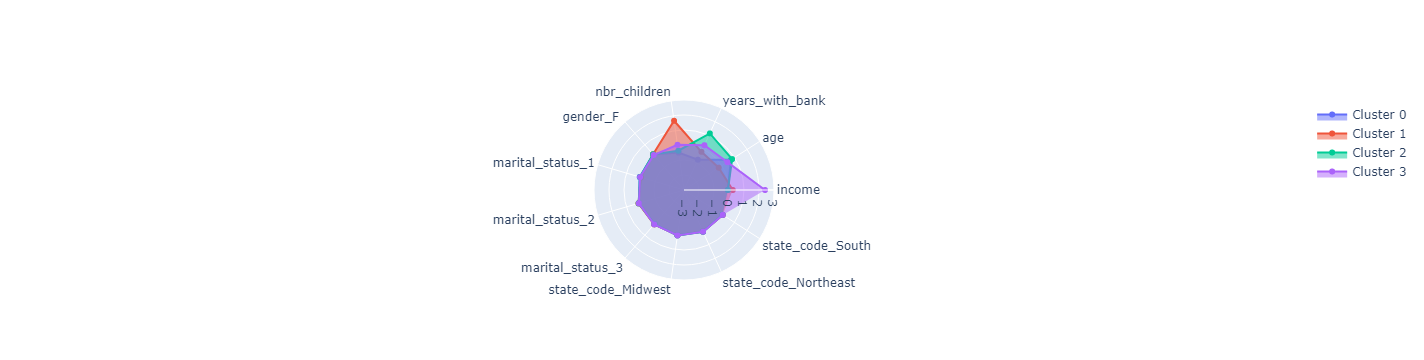

In [76]:

features = list(means.columns)

fig = go.Figure()

clusters=[0,1,2,3]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-3, 3]
        )),
      showlegend=True
    )

fig.show()

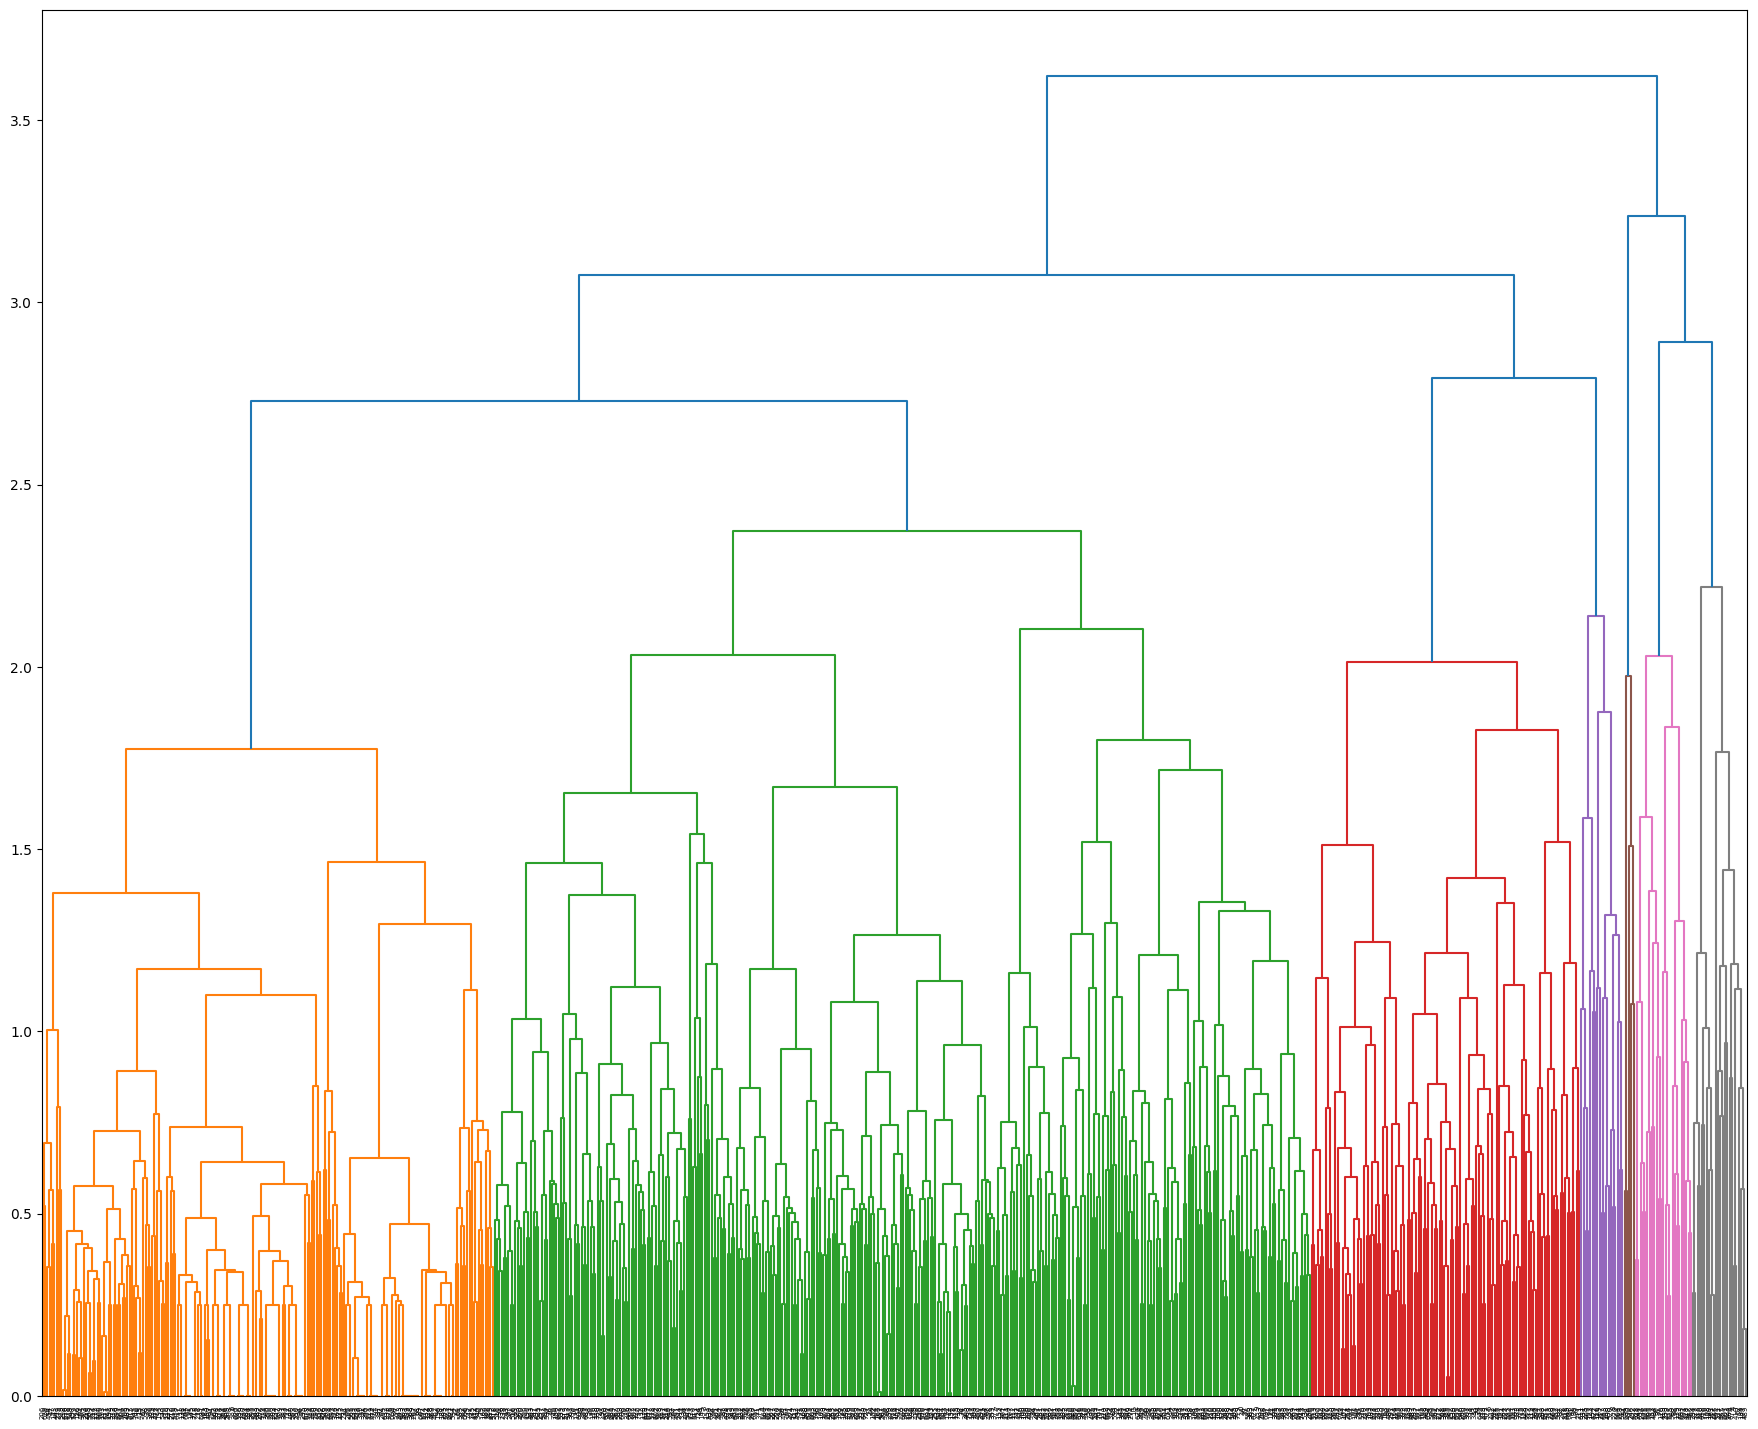

In [31]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'average' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

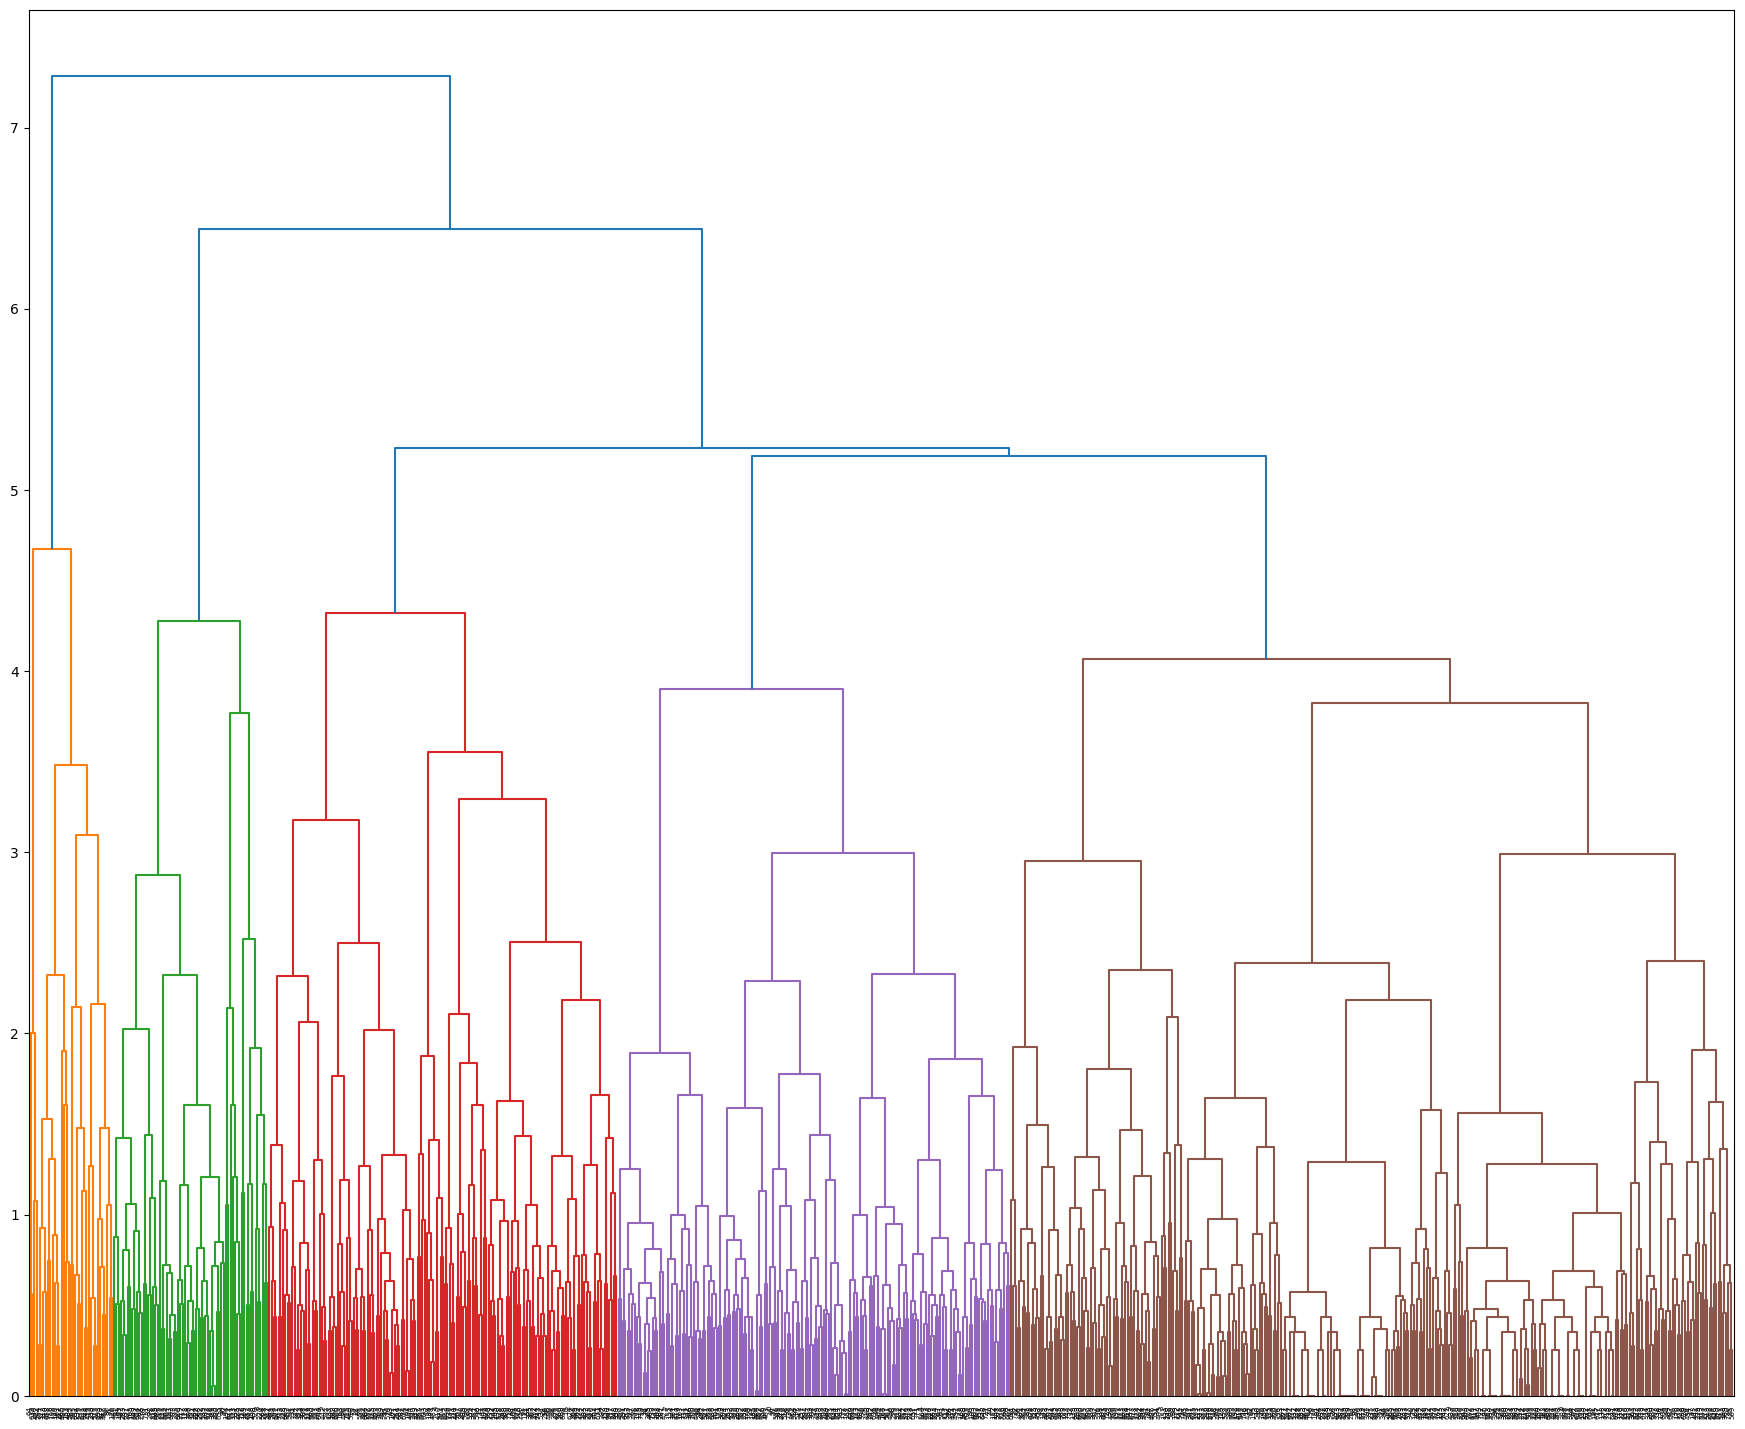

In [32]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'complete' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

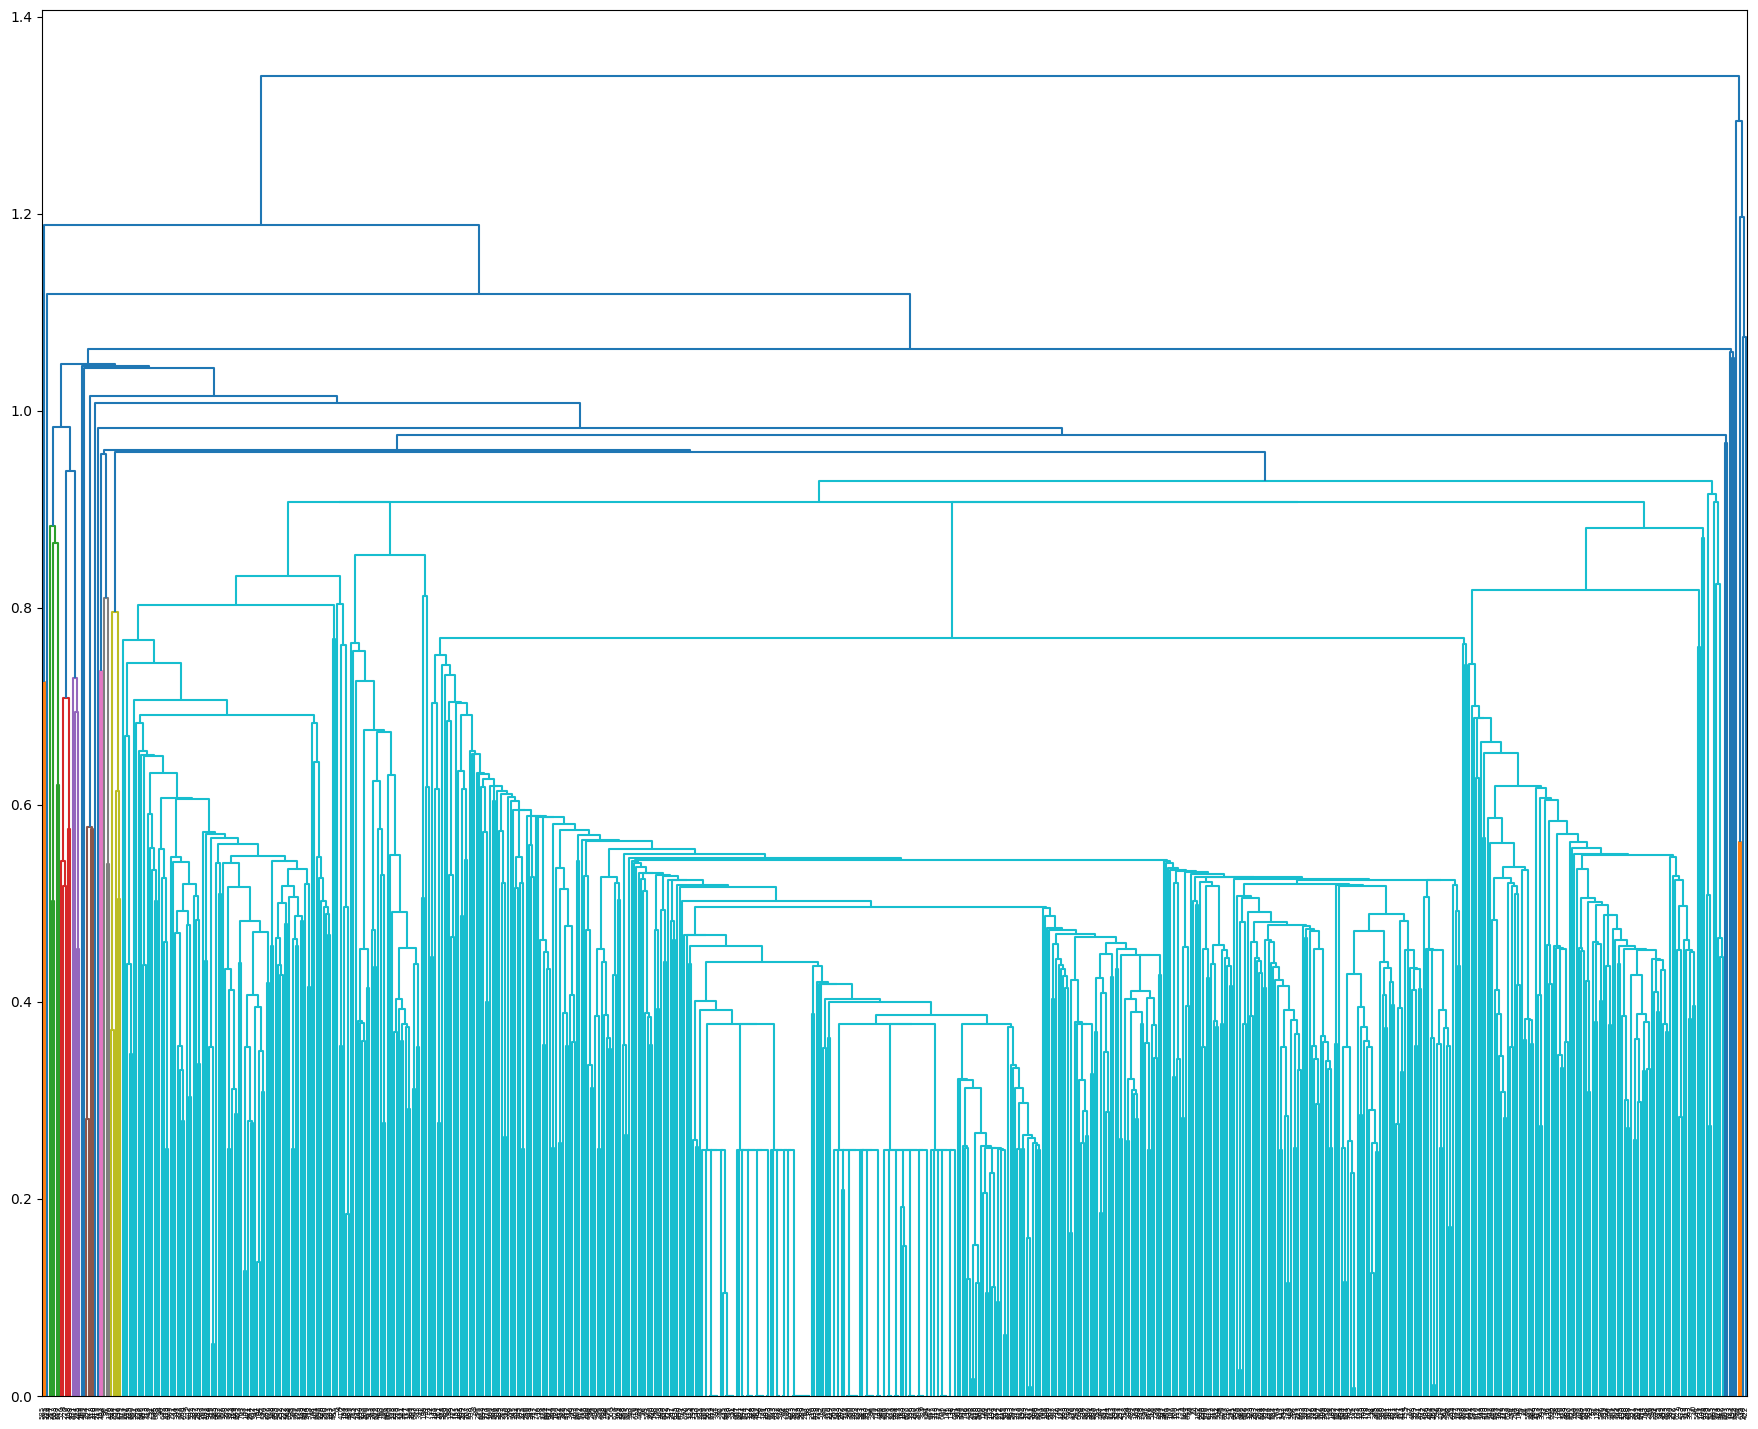

In [33]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'single' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering
# single
single = AgglomerativeClustering(n_clusters=3, linkage="single")
single_pred = single.fit_predict(df_scaled)

# complete
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(df_scaled)

# average
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(df_scaled)

In [37]:
# comparing the 3 linkage using silhouette score
single_silhouette = silhouette_score(df_scaled, single_pred)
complete_silhouette = silhouette_score(df_scaled, complete_pred)
avg_silhouette = silhouette_score(df_scaled, avg_pred)

print( "Scores: \nSingle:", single_silhouette,"\nComplete: ", complete_silhouette, "\nAverage: ", avg_silhouette)

Scores: 
Single: 0.36112157975215436 
Complete:  0.24816891531680377 
Average:  0.2510831117839515


In [40]:
complete_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,

In [41]:
df2_with_clusters =df_scaled.copy()
df2_with_clusters['label']=complete_pred
df2_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.154185,0.184312,0.408539,0.258591,0.00,0.00,0.25,0.0,0.0,0.00,0.0,0
1,-0.726524,1.493070,-1.087435,-0.648298,0.00,0.00,0.25,0.0,0.0,0.00,0.0,0
2,-0.188366,-0.234490,1.530520,-0.648298,0.25,0.25,0.00,0.0,0.0,0.00,0.0,0
3,1.123798,0.603115,-0.339448,-0.648298,0.25,0.25,0.00,0.0,0.0,0.00,0.0,0
4,0.983479,0.864867,1.904514,1.165479,0.25,0.00,0.00,0.0,0.0,0.25,0.0,0


In [43]:
cluster_0_means = df2_with_clusters[df2_with_clusters['label']==0].mean()
cluster_1_means = df2_with_clusters[df2_with_clusters['label']==1].mean()
cluster_2_means = df2_with_clusters[df2_with_clusters['label']==2].mean()
means2= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means])
means2=means2.drop('label',axis=1)
means2

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,-0.204015,0.012258,0.092218,-0.227343,0.144860,0.105140,0.115265,0.011682,0.049844,0.051012,0.060748
1,2.886021,0.397958,-0.208045,0.111528,0.067568,0.040541,0.141892,0.054054,0.067568,0.047297,0.074324
2,0.355810,-0.332262,-0.757441,2.085705,0.132353,0.000000,0.132353,0.036765,0.062500,0.036765,0.058824


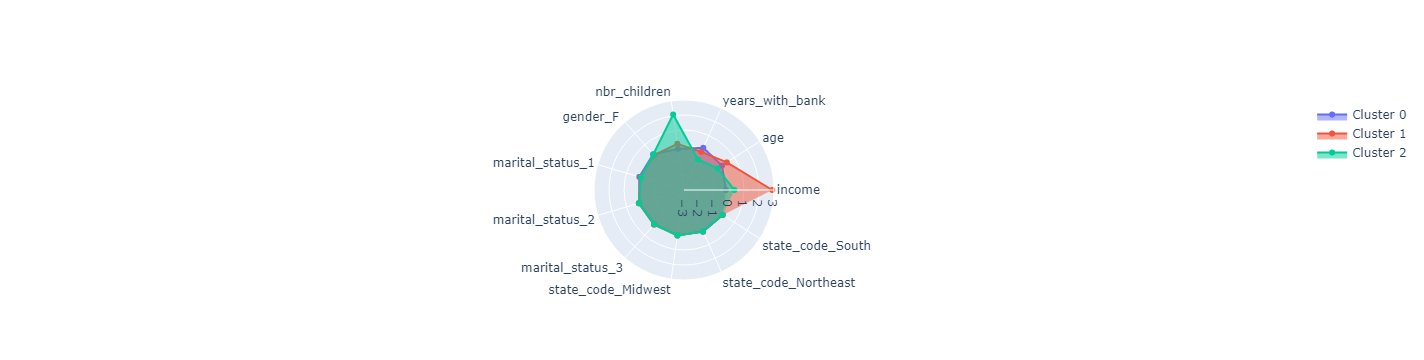

In [77]:

features = list(means2.columns)

fig = go.Figure()

clusters=[0,1,2]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means2.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-3, 3]
        )),
      showlegend=True
    )

fig.show()

In [46]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [60]:
##### Compute DBSCAN
db = DBSCAN(eps=0.9, min_samples=10)
db.fit(df_scaled) #algorithm runs

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
#core_samples_mask will be True if the data point was a core point. Otherwise false.

labels = db.labels_
#actual cluster label. If outliers, gets assigned -1

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #number of unique clusters labels (excluding -1)
n_noise_ = list(labels).count(-1) #counts how many outliers there are (labels with -1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)




Estimated number of clusters: 4
Estimated number of noise points: 89


In [61]:
df3_with_clusters =df_scaled.copy()
df3_with_clusters['label']=labels
df3_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.154185,0.184312,0.408539,0.258591,0.00,0.00,0.25,0.0,0.0,0.00,0.0,0
1,-0.726524,1.493070,-1.087435,-0.648298,0.00,0.00,0.25,0.0,0.0,0.00,0.0,1
2,-0.188366,-0.234490,1.530520,-0.648298,0.25,0.25,0.00,0.0,0.0,0.00,0.0,1
3,1.123798,0.603115,-0.339448,-0.648298,0.25,0.25,0.00,0.0,0.0,0.00,0.0,1
4,0.983479,0.864867,1.904514,1.165479,0.25,0.00,0.00,0.0,0.0,0.25,0.0,-1


In [62]:
cluster_0_means = df3_with_clusters[df3_with_clusters['label']==0].mean()
cluster_1_means = df3_with_clusters[df3_with_clusters['label']==1].mean()
cluster_2_means = df3_with_clusters[df3_with_clusters['label']==2].mean()
cluster_3_means = df3_with_clusters[df3_with_clusters['label']==3].mean()

means3= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means])
means3=means3.drop('label',axis=1)
means3

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.084541,0.129318,0.181876,0.258591,0.146465,0.000000,0.191919,0.012626,0.037879,0.053030,0.055556
1,-0.391574,0.008043,-0.004201,-0.648298,0.142455,0.150338,0.083333,0.007320,0.054054,0.051239,0.060248
2,0.086426,-0.217232,-0.179165,1.165479,0.153846,0.000000,0.175824,0.038462,0.054945,0.046703,0.082418
3,0.060718,-0.500604,-0.682276,2.072368,0.135417,0.000000,0.166667,0.031250,0.041667,0.052083,0.031250


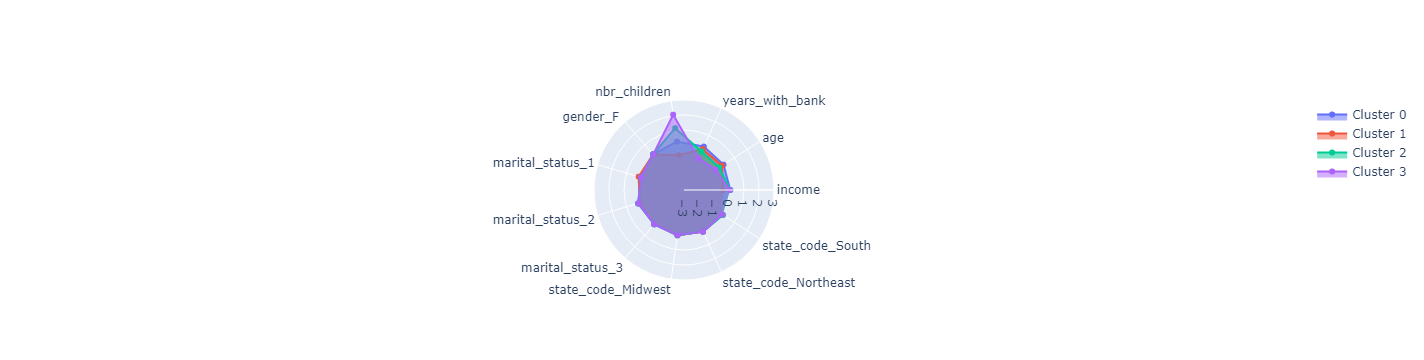

In [78]:
features = list(means3.columns)

fig = go.Figure()

clusters=[0,1,2,3]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means3.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-3, 3]
        )),
      showlegend=True
    )

fig.show()

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(df_scaled)


In [80]:
explained_variance= np.insert(pca.explained_variance_ratio_,0,0)

In [81]:
# preparing the cumulative variance
cumulative_variance=np.cumsum(np.round(explained_variance, decimals=3))

In [82]:
pc_df=pd.DataFrame(['','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], columns=['PC'])
explained_variance_df= pd.DataFrame(explained_variance,columns=['Explained Variance'])
cumulative_variance_df= pd.DataFrame(cumulative_variance,columns=['Cumulative Variance'])
df_explained_variance= pd.concat([pc_df,explained_variance_df,cumulative_variance_df],axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.338755,0.339
2,PC2,0.288086,0.627
3,PC3,0.210533,0.838
4,PC4,0.145831,0.984
5,PC5,0.003920,0.988
6,PC6,0.003648,0.992
7,PC7,0.003408,0.995
8,PC8,0.003099,0.998
9,PC9,0.001253,0.999


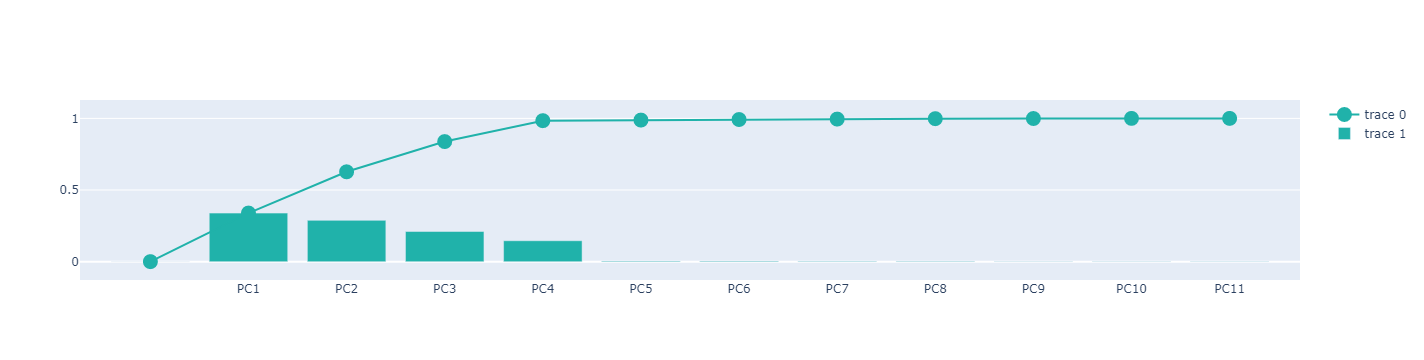

In [83]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(
    go.Scatter(
        x= df_explained_variance['PC'],
        y= df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="lightSeaGreen")
    ))
fig.add_trace(
    go.Bar(
        x = df_explained_variance['PC'],
        y = df_explained_variance['Explained Variance'],
        marker=dict(color="lightSeaGreen")
    ))
fig.show()

In [70]:
pca=PCA(n_components=4).set_output(transform="pandas")
df_pca = pca.fit_transform(df_scaled)
df_pca.head()

,pca0,pca1,pca2,pca3
0,0.437850,-0.121322,0.295027,-0.086423
1,-0.277384,-0.666449,-1.650575,-1.061235
2,-0.099107,-1.210074,1.060735,0.528410
3,0.702540,-0.257026,-1.016011,0.748019
4,2.150482,-0.540125,1.315215,-0.162371


In [71]:
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['label'] = df_scaled_with_clusters['label']
df_pca_with_clusters.head()

,pca0,pca1,pca2,pca3,label
0,0.437850,-0.121322,0.295027,-0.086423,2
1,-0.277384,-0.666449,-1.650575,-1.061235,0
2,-0.099107,-1.210074,1.060735,0.528410,2
3,0.702540,-0.257026,-1.016011,0.748019,0
4,2.150482,-0.540125,1.315215,-0.162371,2


In [72]:
# to visualize centroids in PCA space
pca_centroids = pca.transform(km.cluster_centers_)
pca_centroids

,pca0,pca1,pca2,pca3
0,-0.101854,-0.222871,-1.107483,-0.274479
1,0.679260,1.341512,0.576042,-0.594342
2,0.560525,-1.280062,0.361706,-0.149422
3,-1.442152,0.153102,0.364859,0.394236
4,1.969908,0.192788,-0.444346,1.388580


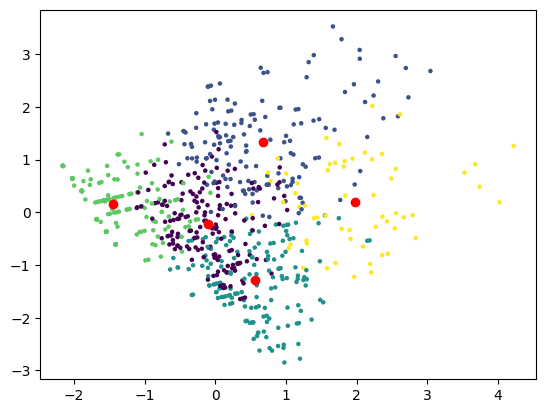

In [73]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca1'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca1'], c='red')
plt.show()

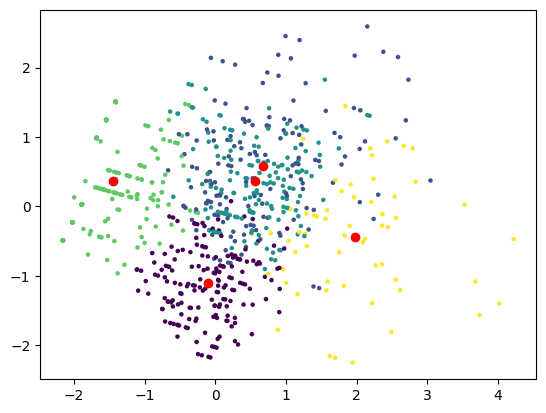

In [74]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca2'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca2'], c='red')
plt.show()

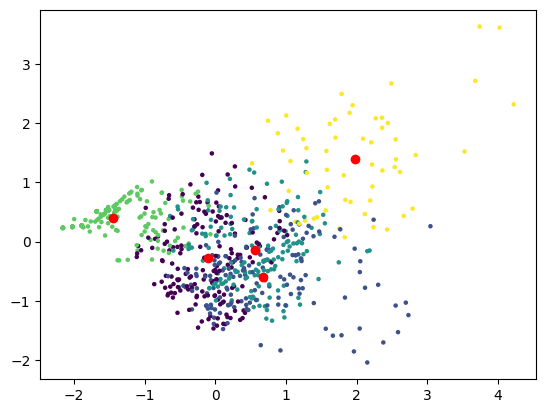

In [75]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca3'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca3'], c='red')
plt.show()